### Importando os dados e convertendo em array

In [1]:
!wget https://raw.githubusercontent.com/PhysMAR/computational_bootcamp/main/resources/data/WestCoastSaildroneData.txt

--2023-08-23 08:49:23--  https://raw.githubusercontent.com/PhysMAR/computational_bootcamp/main/resources/data/WestCoastSaildroneData.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11871729 (11M) [text/plain]
Saving to: ‘WestCoastSaildroneData.txt’

WestCoastSaildroneD 100%[===================>]  11.32M  --.-KB/s    in 0.1s    

2023-08-23 08:49:24 (82.1 MB/s) - ‘WestCoastSaildroneData.txt’ saved [11871729/11871729]



In [6]:
import numpy as np

In [7]:
dados = np.loadtxt('WestCoastSaildroneData.txt') # lê os dados e os converte em um array numpy

In [8]:
dados.shape?
# 96868 medidas em 8 variáveis

Type:        tuple
String form: (96868, 8)
Length:      2
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.

### Criando dicionário com matrizes de dados separadas
Inserir chaves que identificam cada uma das variáveis.
1. dic_dados define o nome do dicionario
2. dict(   ) criar o dicionario
3. chave = valor atribui uma chave a uma lista de dados
4. dados[   ,  ] define a separação da matriz do array inicial que é atribuída a cada chave

In [9]:
dic_dados = dict(ano = dados[:,0],
                 diaj = dados[:,1],
                 longitude = dados[:,2],
                 latitude = dados[:,3],
                 temperatura = dados[:,4],
                 salinidade = dados[:,5],
                 oxigenio = dados[:,6],
                 clorofila = dados[:,7])

In [10]:
dic_dados.keys() # lista as chaves criadas no dicionario

dict_keys(['ano', 'diaj', 'longitude', 'latitude', 'temperatura', 'salinidade', 'oxigenio', 'clorofila'])

### Plotando Gráfico 1: Scatter plot Salinidade e Temperatura

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Temperatura [°C]')

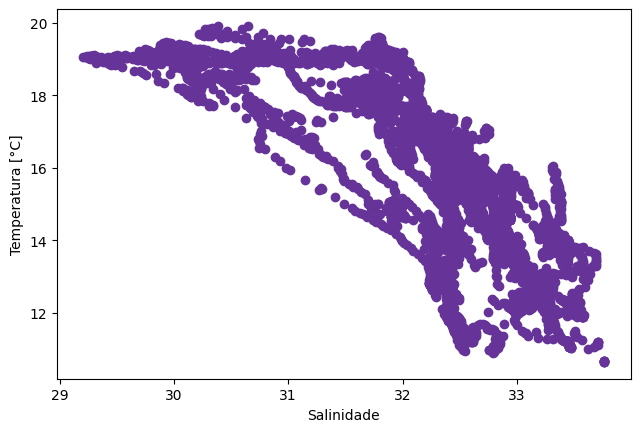

In [12]:
plt.figure(figsize=[7.4,4.8])
plt.scatter(dic_dados['salinidade'],
            dic_dados['temperatura'],
            color='rebeccapurple')
plt.xlabel('Salinidade')
plt.ylabel('Temperatura [°C]')

### Plotando Gráfico 2: Scatter plot Oxigênio e Clorofila

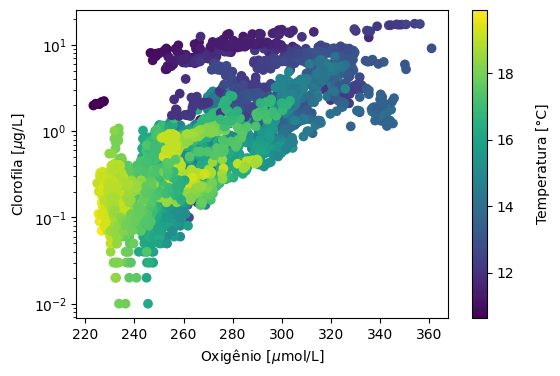

In [13]:
plt.figure(figsize=[6,4])
plt.scatter(dic_dados['oxigenio'],
            dic_dados['clorofila'],
            c = dic_dados['temperatura'])
plt.xlabel(r'Oxigênio [$\mu$mol/L]')
plt.ylabel(r'Clorofila [$\mu$g/L]') #escrever no modo matemático $$ e com r no início da string
plt.yscale('log') # muda a escala: clorofila é muito variável
plt.colorbar(label='\nTemperatura [°C]')

### Plotando Gráfico 3: Colormap Temperatura por Lat Long

In [14]:
!wget https://raw.githubusercontent.com/PhysMAR/computational_bootcamp/main/resources/data/WestCoastShoreLine.txt

--2023-09-08 14:58:15--  https://raw.githubusercontent.com/PhysMAR/computational_bootcamp/main/resources/data/WestCoastShoreLine.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 424056 (414K) [text/plain]
Saving to: ‘WestCoastShoreLine.txt.1’

WestCoastShoreLine. 100%[===================>] 414.12K  --.-KB/s    in 0.007s  

2023-09-08 14:58:16 (57.1 MB/s) - ‘WestCoastShoreLine.txt.1’ saved [424056/424056]



In [15]:
shoreline = np.loadtxt('WestCoastShoreLine.txt')

In [16]:
dic_shoreline = dict(longshoreline = shoreline[:,0],
                     latshoreline = shoreline[:,1])

In [17]:
dic_shoreline.keys()

dict_keys(['longshoreline', 'latshoreline'])

Text(0, 0.5, 'Latitude [°N]')

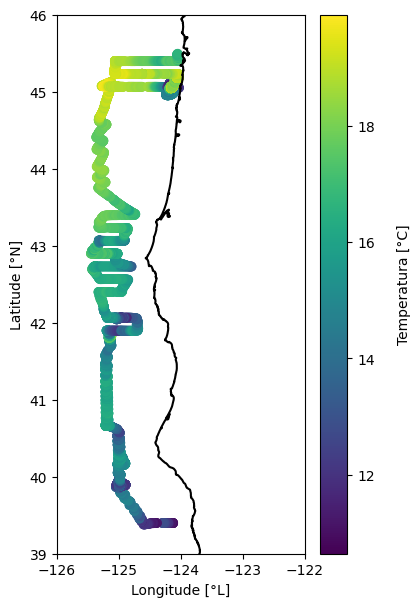

In [18]:
plt.figure(figsize=[4,7])
plt.scatter(dic_dados['longitude'],
            dic_dados['latitude'],
            c=dic_dados['temperatura'])
plt.axis([-126,-122,39,46])
plt.plot(dic_shoreline['longshoreline'],
         dic_shoreline['latshoreline'],
         markersize=1,
         color = 'black')
plt.colorbar(label='\nTemperatura [°C]')
plt.xlabel('Longitude [°L]')
plt.ylabel('Latitude [°N]')

### Plotando Gráfico 4: Colormap Salinidade por Lat Long

Text(0, 0.5, 'Latitude [°N]')

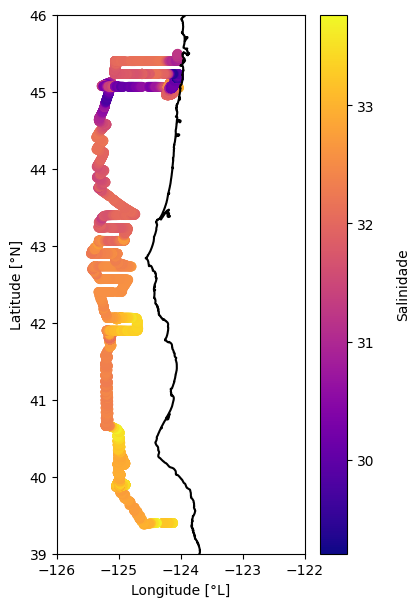

In [20]:
plt.figure(figsize=[4,7])
plt.scatter(dic_dados['longitude'],
            dic_dados['latitude'],
            c=dic_dados['salinidade'],
           cmap='plasma')
plt.axis([-126,-122,39,46])
plt.plot(dic_shoreline['longshoreline'],
         dic_shoreline['latshoreline'],
         markersize=1,
         color = 'black')
plt.colorbar(label='\nSalinidade')
plt.xlabel('Longitude [°L]')
plt.ylabel('Latitude [°N]')

### Testes

Text(0, 0.5, 'Temperatura [°C]')

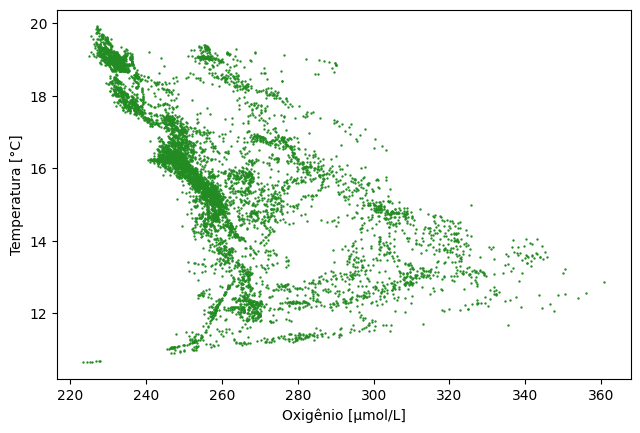

In [21]:
plt.figure(figsize=[7.4,4.8])
plt.scatter(dic_dados['oxigenio'],
            dic_dados['temperatura'],
            s=0.5,
            color = 'forestgreen')
plt.xlabel('Oxigênio [\u03BCmol/L]')
plt.ylabel('Temperatura [°C]')